Drawing attractive figures is important. When making figures for yourself, as you explore a dataset, it's nice to have plots that are pleasant to look at. Visualizations are also central to communicating quantitative insights to an audience, and in that setting it's even more necessary to have figures that catch the attention and draw a viewer in.

Matplotlib is highly customizable, but it can be hard to know what settings to tweak to acheieve an attractive plot. Seaborn comes with a number of customized themes and high-level for controlling the look of matplotlib figures.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Let's define a simple function to plot some offset sine waves, which help us see the different stylistic parameters we can tweak.

In [4]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i *.5) * (7-i) * flip)

This is what the plot looks like with matplotlib defaults:

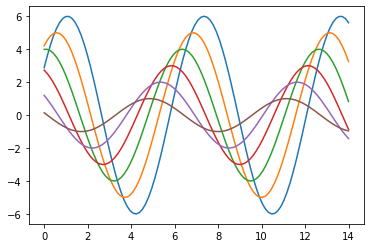

In [5]:
sinplot()

To switch to seaborn defaults, simply call the set_them() function.

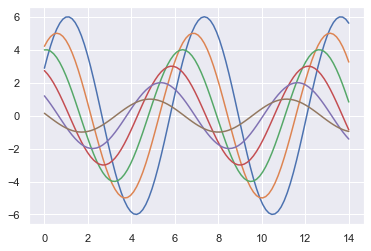

In [7]:
sns.set_theme()
sinplot()

Seaborn splits matplotlib parameters into two independent groups. The first group sets the aesthetic style of the plot

Seaborn splits matplotlib parameters into two independent groups. The first group sets the aesthetic style of the plot, and the second scales various elements of the figure so that is caan beeasily incorporated into different contexts. 

The interface for manipulating these parameters are two pairs of functions. To control the style, use the axes_style() and set)style() functions. To scale the plot, use the plotting_context() and set_context() functions. In both cases, the first function returns a dictionary of parameters and the second sets the matplotlib defaults.

Seaborn figure styles
There are five preset seaborn themes: darkgrid, whitegrid, dark, white, and ticks. They are each suited to different applications and personal preferences. The default theme is darkgrid. As mentioned above, the grid helps the plot serve as lookup table for quantitative information, and the white-on grey helps to keep the grid from competing with lines that represent data. The whitegrid theme is similar, but it is better suited to plots with heavy data elements:

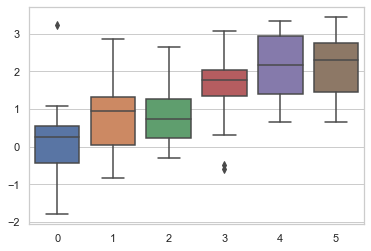

In [8]:
sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data);

For many plots, (especially for settings like talks, where you primarily want to use figures to provide impressions of patterns in the data), the grid is less necessary.

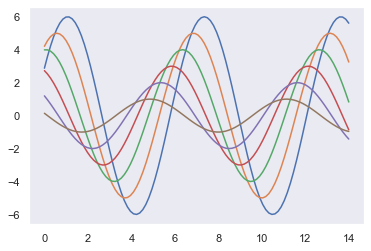

In [9]:
sns.set_style("dark")
sinplot()

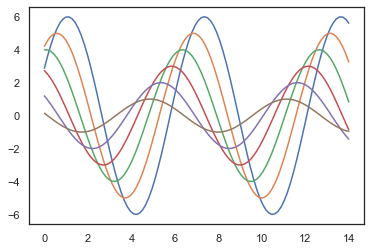

In [10]:
sns.set_style("white")
sinplot()

Sometimes you might want to give a little extra structure to the plots, which is where ticks come in handy:

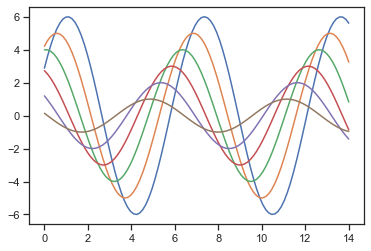

In [11]:
sns.set_style("ticks")
sinplot()

Removing axes spines
Both the white and ticks styles can benefit from removing the top and right axes spines, which are not needed. The seaborn function despine() can be called to remove them:

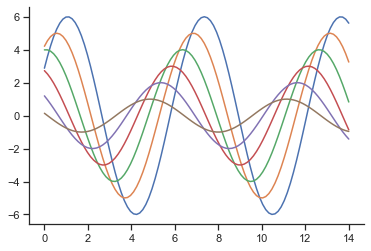

In [12]:
sinplot()
sns.despine()

Some plots benefit from offsetting the spines away from the data, which can also be done when calling despine(). When the tickks don't cover the whole range of the axis, the trim parameter will limit the range of the surviging spines.

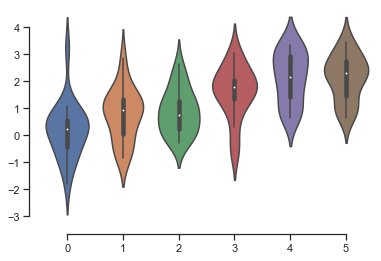

In [13]:
f, ax = plt.subplots()
sns.violinplot(data=data)
sns.despine(offset=10, trim=True);

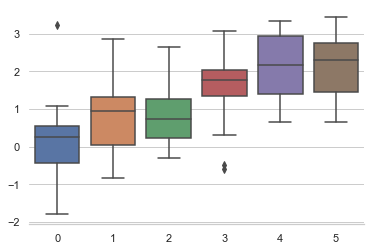

In [14]:
sns.set_style("whitegrid")
sns.boxplot(data=data, palette="deep")
sns.despine(left=True)

Temporarily setting figure style
Although it's easy to switch back and forth, you can also use the axes_style() function in a with statement to temporarily set plot parameters. This also allows you to make figures with differently-style axes:

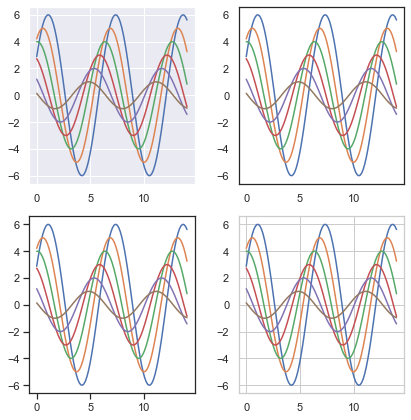

In [17]:
f = plt.figure(figsize=(6,6))
gs = f.add_gridspec(2,2)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0,0])
    sinplot()
    
with sns.axes_style("white"):
    ax = f.add_subplot(gs[0,1])
    sinplot()
    
with sns.axes_style("ticks"):
    ax = f.add_subplot(gs[1,0])
    sinplot()
    
with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[1,1])
    sinplot()
    
f.tight_layout()

Overriding elements of the seaborn styles
If you want to customize the seaborn styles, you can pass a dictionary of parameters to the rc argument of axes_style() and set_style(). Note that you can only ovveride the parameters that are part of the style definition through
this method. (However, the higher-level set_theme() function takes a dictionary of any matplotliib parameters).

If you want to see what parameters are included, you can just call the function with no arguments, which will return the current settings:

In [18]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

In [ ]:
sns.set_style("dargrid", {"axes.facecolor": ".9"})
sinplot()

Scaling plot elements 
A separate set of parameters control the scale of plot elements, which should let you use the same code to make plots that are suited for use in settings where larger or smaller plots are appropriate.

First let's reset the default parameters by calling set_theme():


In [19]:
sns.set_theme()

The four preset contexts, in order of relative size are paper, notebook, talk, and poster. The notebook style is the default, and was used in the plots above.

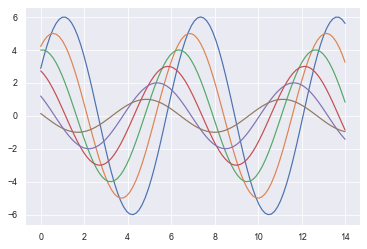

In [20]:
sns.set_context("paper")
sinplot()

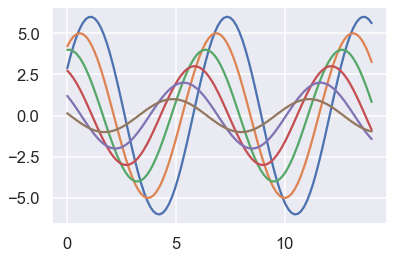

In [22]:
sns.set_context("talk")
sinplot()

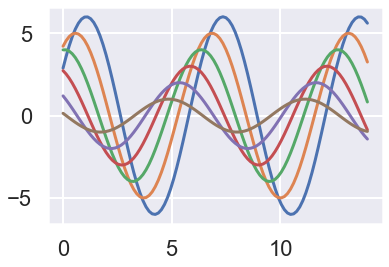

In [23]:
sns.set_context("poster")
sinplot()

Most of what you now know about the style functions should transfer to the context functions.

You can call set_context() with one of these names to set the parametesr, and you can override the parameters by providinng a dictionary of parameter values.

You can also independely scale the size of the font elements when changing the context. (This option is also available through the top-level set() function).

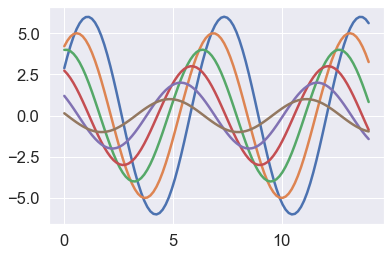

In [27]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":2.5})
sinplot()